In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib.colors import ListedColormap
from math import dist
from collections import Counter

In [13]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

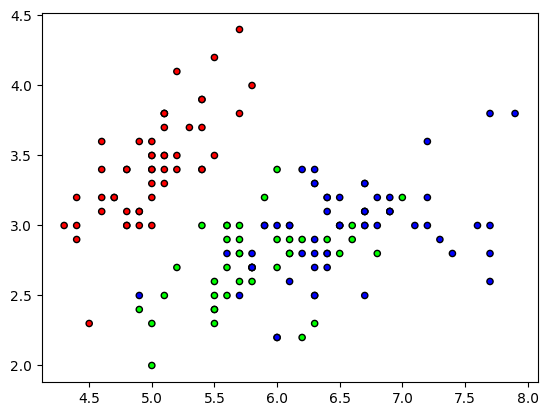

In [16]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolors='k', s = 20)

In [49]:
class KNN:
	def __init__(self, X, y, K = 3) -> None:
		self.K = K
		self.X = np.array(X)
		self.y = np.array(y)

	def predict(self, X):
		predicted_labels = [self._predict(x) for x in X]
		return np.array(predicted_labels)

	def _predict(self, X):
		distance = [dist(X, x) for x in self.X]
		k_indices = np.argsort(distance)[:self.K]

		k_nearest = self.y[k_indices]
		
		most_common = Counter(k_nearest).most_common(1)[0][0]
		return most_common

	def score(self, X, y):
		res = self.predict(X) == y
		return np.sum(res) / len(res)

In [50]:
model = KNN(X_train, y_train)

In [51]:
model.score(X_test, y_test)

1.0